In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset
path = kagglehub.dataset_download('ayeshaimran123/social-media-and-mental-health-balance')

# Shows the folder where KaggleHub downloaded the dataset
print(path)


C:\Users\qinha\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\qinha\.cache\kagglehub\datasets\ayeshaimran123\social-media-and-mental-health-balance\versions\1


In [3]:
# Load the dataset into a DataFrame
df = pd.read_csv(path + '/Mental_Health_and_Social_Media_Balance_Dataset.csv')

# Display first rows to confirm correct loading
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [5]:
# Dataset overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [6]:
# Check for null values in the dataset
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

Q1: Does screen time affect the sleep quality ?

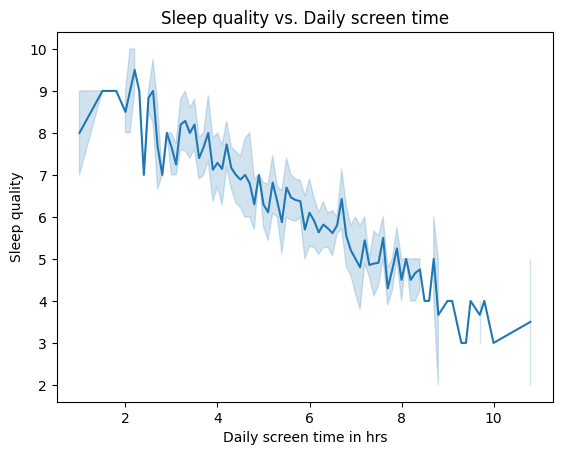

In [52]:
sns.lineplot(data=df, 
             x="Daily_Screen_Time(hrs)", 
             y="Sleep_Quality(1-10)")

plt.xlabel("Daily screen time in hrs")
plt.ylabel("Sleep quality")
plt.title("Sleep quality vs. Daily screen time")
plt.show()

Conclusion:
- In conclusion, the graph shows that the screen time increases, sleep quality decreases.
-Prolonged exposure to screens, reduce total sleep duration and negatively impact the overall sleep quality

Q2: Does exercise frequnecy relate to stress ,sleep quality or hapiness?

In [ ]:
# Group by exercise frequency and compute average

average_by_freq = df.groupby("Exercise_Frequency(week)").agg({"Stress_Level(1-10)":"mean",
                                                       "Happiness_Index(1-10)":"mean",
                                                       "Sleep_Quality(1-10)":"mean"}).sort_values(by="Exercise_Frequency(week)").reset_index()
print(average_by_freq)

   Exercise_Frequency(week)  Stress_Level(1-10)  Happiness_Index(1-10)  \
0                       0.0            6.232558               8.534884   
1                       1.0            6.648352               8.428571   
2                       2.0            6.803030               8.250000   
3                       3.0            6.700855               8.205128   
4                       4.0            6.520000               8.413333   
5                       5.0            6.416667               8.777778   
6                       6.0            5.500000               9.500000   
7                       7.0            6.000000              10.000000   

   Sleep_Quality(1-10)  
0             6.325581  
1             6.439560  
2             6.196970  
3             6.188034  
4             6.240000  
5             6.666667  
6             7.000000  
7             8.000000  


In [ ]:
# Melt the DataFrame for seaborn compatibility

average_by_freq_melted = average_by_freq.melt(id_vars='Exercise_Frequency(week)', 
                              value_vars=['Stress_Level(1-10)','Happiness_Index(1-10)','Sleep_Quality(1-10)'],
                              var_name='Metric', 
                              value_name='Score')
print(average_by_freq_melted)

    Exercise_Frequency(week)                 Metric      Score
0                        0.0     Stress_Level(1-10)   6.232558
1                        1.0     Stress_Level(1-10)   6.648352
2                        2.0     Stress_Level(1-10)   6.803030
3                        3.0     Stress_Level(1-10)   6.700855
4                        4.0     Stress_Level(1-10)   6.520000
5                        5.0     Stress_Level(1-10)   6.416667
6                        6.0     Stress_Level(1-10)   5.500000
7                        7.0     Stress_Level(1-10)   6.000000
8                        0.0  Happiness_Index(1-10)   8.534884
9                        1.0  Happiness_Index(1-10)   8.428571
10                       2.0  Happiness_Index(1-10)   8.250000
11                       3.0  Happiness_Index(1-10)   8.205128
12                       4.0  Happiness_Index(1-10)   8.413333
13                       5.0  Happiness_Index(1-10)   8.777778
14                       6.0  Happiness_Index(1-10)   9

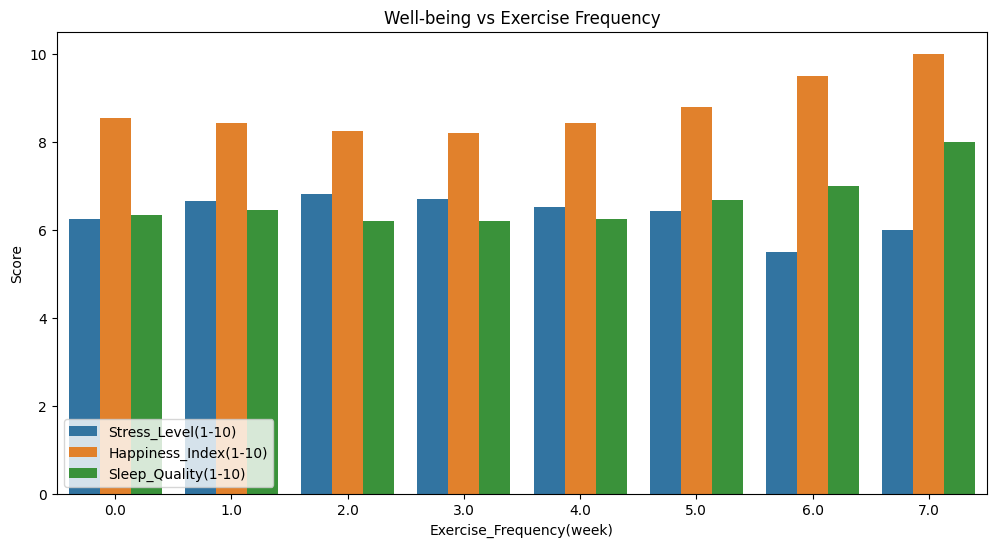

In [ ]:
plt.figure(figsize=(12,6))

# Plot bar graph comparing well-being metrics

sns.barplot(x='Exercise_Frequency(week)', 
            y='Score', 
            hue='Metric', 
            data=average_by_freq_melted)

plt.title('Well-being vs Exercise Frequency')
plt.legend(loc= "lower left")
plt.show()


Conclusion:
- Sleep quality (Green) remains relatively steady when exercise frequency is between 0 to 4 times per week. However, starting at 5 sessions per week, sleep quality begins to improve, showing an upward trend as exercise frequency increases up to 7 times per week.
- The same pattern can be observed with happiness index (Orange).
- The stress level (blue) remains relatively steady when exercise frequency is between 0 to 4 times per week. Starting at 5 sessions per week, stress leven begins to decrease with increasing exercise frequency.

Q3: Do users who take more Days_Without_Social_Media have higher sleep quality or happiness?

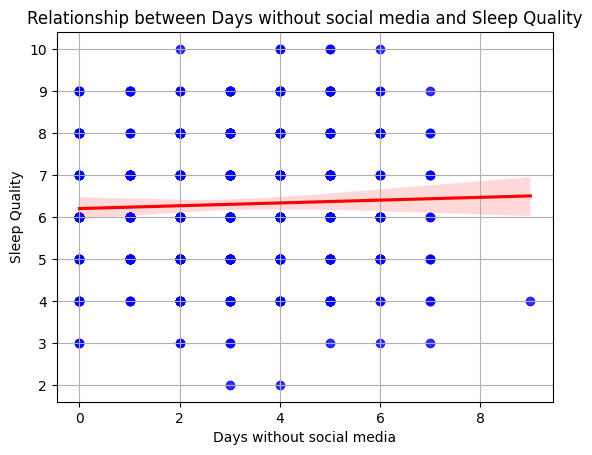

In [ ]:
# Sleep quality regression

sns.regplot(x='Days_Without_Social_Media', 
            y='Sleep_Quality(1-10)', 
            data= df,
            color= "blue",
            line_kws= {"color": "red"})

plt.title('Relationship between Days without social media and Sleep Quality')
plt.xlabel('Days without social media')
plt.ylabel('Sleep Quality')
plt.grid(True)
plt.show()


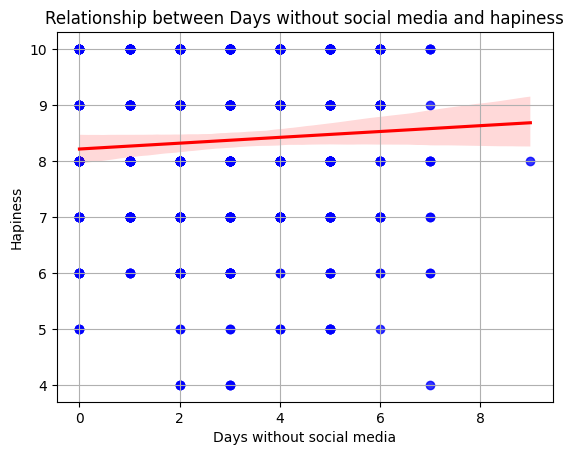

In [ ]:
# Happiness regression

sns.regplot(x='Days_Without_Social_Media', 
            y="Happiness_Index(1-10)", 
            data= df,
            color= "blue",
            line_kws= {"color": "red"})

plt.title('Relationship between Days without social media and hapiness')
plt.xlabel('Days without social media')
plt.ylabel('Hapiness')
plt.grid(True)
plt.show()

Conclusion:
-The regression plot indicates a positive relationship between the number of days without social media and both happiness and sleep quality, as the duration of social media abstinence increases, the data shows higher levels of happiness and improved sleep quality.

Q4: Which social media plattform has the highest stress level?

In [ ]:
# Calculate mean stress per platform

average_stress = df.groupby("Social_Media_Platform")["Stress_Level(1-10)"].mean().sort_values(ascending=False).reset_index()
print(average_stress)

  Social_Media_Platform  Stress_Level(1-10)
0             Instagram            6.959459
1              Facebook            6.666667
2               YouTube            6.640000
3                TikTok            6.589474
4              LinkedIn            6.459770
5           X (Twitter)            6.454545


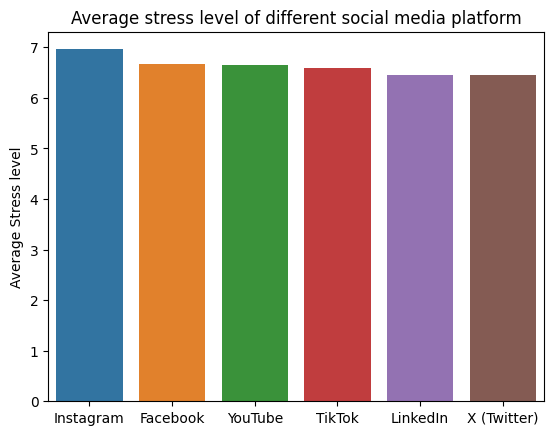

In [ ]:
# Plot stress levels by platform
 
sns.barplot(data=average_stress, 
            x="Social_Media_Platform", 
            y="Stress_Level(1-10)", 
            palette="tab10", 
            hue="Social_Media_Platform")

plt.title("Average stress level of different social media platform")
plt.ylabel("Average Stress level")
plt.xlabel("")
plt.show()

Conclusion: 
- Among all the platforms analyzed, Instagram shows the highest average stress level, followed by Facebook and Youtube. 
- Platforms like LinkedIn and X(Twitter) shows slightly lower average stress levels compared to the others.

Q5: Which factors are most strongly related to happiness?

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr(numeric_only=True)

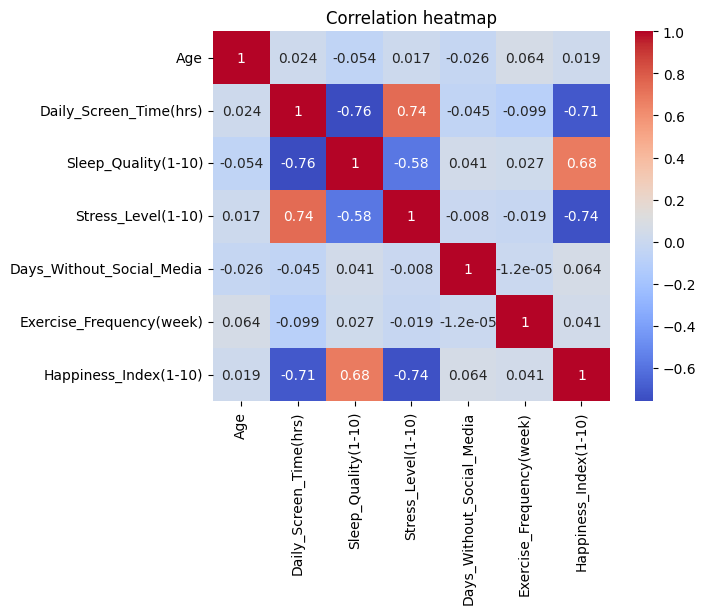

In [ ]:
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

Conclusion:

-Positive correlation (0.68) between happiness and sleep quality. This means that as sleep quality increases, happiness also tends to increase. A correlation of 0.68 is moderately strong, indicating a fairly consistent relationship, though not perfect.

-Negative correlation (-0.74) between happiness and stress level. This indicates that as stress levels increase, happiness tends to decrease. The magnitude of -0.74 is strong, suggesting a clear inverse relationship.

-Negative correlation (-0.71) between happiness and daily screen time. This shows that higher daily screen time is associated with lower happiness. Again, -0.71 is a strong negative correlation, highlighting a significant inverse relationship.

Overall Conclusion:

-The analysis shows that lifestyle factors such as screentime, sleep quality and exercise frequency have noticible effects on the stress level and hapiness levels.
-Maintaining a balanced routine with limited screen time and regular physical activity contributes to better mental well being. 